# Numerical Methods: Double Pendulum
## Theory
<div>
<img src="double_pendulum.png" width="500"/>
</div>


<br/>

A double pendulum consists of a single pendulum with length $L_1$, mass $m_1$, angle $\phi_1$ with a second mass $m_2$ attached by a rod of length $L_2$ with an angle $\phi_2$ to the vertical axis. The Lagrangian of such a system can be found to be
$$\mathcal{L} = T - U$$
$$\mathcal{L} = [\frac{1}{2}(m_1+m_2)L_1^2\dot{\phi_1}^2 + m_2L_1L_2\dot{\phi_1}\dot{\phi_2}\cos{(\phi_1-\phi_2)} + \frac{1}{2}m_2L_2^2\dot{\phi_2}^2] - [(m_1+m_2)gL_1(\cos{\phi_1}-1) + m_2gL_2(cos{\phi_2}-1)]$$

<br/>

The Euler-Lagrange Equations for $\phi_1$ and $\phi_2$ are therefore

$$\frac{d}{dt}(\frac{\partial\mathcal{L}}{\partial\dot{\phi_1}}) = \frac{\partial\mathcal{L}}{\partial\phi_1}$$

$$(m_1+m_2)L_1^2\ddot{\phi_1} + m_2L_1L_2\ddot{\phi_2}\cos{(\phi_1-\phi_2)} + m_2L_1L_2\dot{\phi_2}\sin{(\phi_1-\phi_2)}(\dot{\phi_2}-\dot{\phi_1}) = -m_2L_1L_2\dot{\phi_1}\dot{\phi_2}\sin{(\phi_1-\phi_2)} - (m_1+m_2)gL_1\sin{\phi_1}$$

<br/>

$$\frac{d}{dt}(\frac{\partial\mathcal{L}}{\partial\dot{\phi_2}}) = \frac{\partial\mathcal{L}}{\partial\phi_2}$$

$$m_2L_2^2\ddot{\phi_2} + m_2L_1L_2\ddot{\phi_1}\cos{(\phi_1-\phi_2)} - m_2L_1L_2\dot{\phi_1}\sin{(\phi_1-\phi_2)}(\dot{\phi_1}-\dot{\phi_2}) = m_2L_1L_2\dot{\phi_1}\dot{\phi_2}\sin{(\phi_1-\phi_2)} - m_2gL_2\sin{\phi_2}$$

<br/>

This nasty set of equations can be simplified to the form [<a href="https://www.diego.assencio.com/?index=1500c66ae7ab27bb0106467c68feebc6">source</a>]

$$\ddot{\phi_1} + \alpha_1(\phi_1,\phi_2)\ddot{\phi_2} = f_1(\phi_1,\phi_2,\dot{\phi_2})$$
$$\alpha_2(\phi_1,\phi_2)\ddot{\phi_1} + \ddot{\phi_2} = f_2(\phi_1,\phi_2,\dot{\phi_1})$$

where $\alpha_1$ and $\alpha_2$ are expressed as

$$\alpha_1(\phi_1,\phi_2) = \frac{m_2L_2}{(m_1+m_2)L_1}\cos{(\phi_1-\phi_2)}$$
$$\alpha_2(\phi_1,\phi_2) = \frac{L_1}{L_2}\cos{(\phi_1-\phi_2)}$$

and the two functions $f_1$ and $f_2$ are

$$f_1(\phi_1,\phi_2,\dot{\phi_2}) = \frac{g}{L_1}\sin{\phi_1} - \frac{m_2L_2}{(m_1+m_2)L_1}\dot{\phi_2}^2\sin{(\phi_1-\phi_2)}$$
$$f_2(\phi_1,\phi_2,\dot{\phi_1}) = \frac{L_1}{L_2}\dot{\phi_1}^2\sin{(\phi_1-\phi_2)} - \frac{g}{L_2}\sin{\phi_2}$$

<br/>

These equations can then be written in matrix form as the equation $\tilde{A}\ddot{\vec{\phi}} = \vec{f}$ in which $\tilde{A}$ is a 2x2 matrix of $\alpha_1$ and $\alpha_2$ and $\vec{f}$ is a 2x1 column vector of $f_1$ and $f_2$. Solving for $\ddot{\vec{\phi}}$, we can find that it is given by $\tilde{A}^{-1}\vec{f}$. Written out for each coordinate,

$$\ddot{\phi_1} = \frac{1}{1-\alpha_1\alpha_2}(f_1 - f_2\alpha_1) = g_1(\phi_1,\phi_2,\dot{\phi_1},\dot{\phi_2})$$
$$\ddot{\phi_2} = \frac{1}{1-\alpha_1\alpha_2}(f_2 - f_1\alpha_2) = g_2(\phi_1,\phi_2,\dot{\phi_1},\dot{\phi_2})$$

<br/>

Letting $\dot{\phi_1} = \omega_1$, $\dot{\phi_2} = \omega_2$, the equations of motion of the double pendulum become a system of coupled first order differential equations. This transformation allows them to be solved using the <b>Runge-Kutta (RK)</b> numerical method.

<br/>

## Runge-Kutta Method [<a href="https://www.jhallard.com/blog/double_pendulum.html">source</a>]

The Runge-Kutta numerical method is particularly useful for cases where the change in a system is a function of time and the current state (e.g. $x' = f(t,x)$). In this case, $x'$ is the column vector $\frac{d}{dt}[\phi_1,\phi_2,\omega_1,\omega_2]$ while the corresponding function $f(t,x)$ is another column vector $[\omega_1,\omega_2,g_1,g_2]$. There are several different methods in the Runge-Kutta family of numerical methods, but in this notebook I've decided to use the 4th order Runge-Kutta (RK4) method which is defined as follows

$$ x_{n+1} = x_n + \frac{h}{6}(K_1(x_n)+2K_2(x_n)+2K_3(x_n)+K_4(x_n))$$
    
Where $h$ is the time step, $x_n$ is the current state vector, $x_{n+1}$ is the next state vector after a time step, and $K_i$ are defined as

$$K_1(x_n) = f(t_n,x_n)$$
$$K_2(x_n) = f(t_n+\frac{h}{2},x_n+\frac{h}{2}K_1(x_n))$$
$$K_3(x_n) = f(t_n+\frac{h}{2},x_n+\frac{h}{2}K_2(x_n))$$
$$K_4(x_n) = f(t_n+h,x_n+hK_3(x_n))$$

<br/>
Runge-Kutta approximations are generally more accurate to the classic Euler approximation, especially for oscillating system like this. A good way to compare the accuracy of the two methods is to calculate the energy of the system. A better approximation method will conserve energy, or at least minimize fluctuations in total energy. In theory, the energy of the system using RK4 should stick tighter to the initial energy versus a simulation using the Euler method.

## Implementation
To begin, I will import the necessary packages.

In [50]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as anim

Here I define the functions that make up the right hand side of the differential equations. These functions are $\alpha_1$, $\alpha_2$, $f_1$, and $f_2$ as defined above. I also define the function <i/>RK4</i> which implements the RK4 method to solve the system of differential equations. Finally, I define the function $\omega_{dot}$ which is the function $f(t,x)$ in the RK4 method. This function takes in the current state $y$ and time $t$ and returns the change in the state $\dot{y}$. I also created a function to plot both $\phi_1$ and $\phi_2$ over time and a helper function to do the simulation. To evaluate the accuracy of the simulation, I will also define a function to calculate the total energy for a given state.

In [110]:
# individual functions that make up RHS of differential equations
def alpha_1(phi1, phi2):
    return (L2/L1) * (m2/(m1+m2)) * np.cos(phi1-phi2)

def alpha_2(phi1, phi2):
    return (L1/L2) * np.cos(phi1-phi2)

def f1(phi1,phi2,w2):
    return (-L2/L1) * (m2/(m1+m2)) * w2*w2*np.sin(phi1-phi2) - (g/L1)*np.sin(phi1)

def f2(phi1,phi2,w1):
    return (L1/L2)*w1*w1*np.sin(phi1-phi2) - (g/L2)*np.sin(phi2)
    
# 4th order Runge-Kutta Method
def RK4(t, y, dt, f):
    # from https://stackoverflow.com/questions/68339204/double-pendulum-rk4
    k1 = dt * f(y,t)
    k2 = dt * f(y + 0.5*k1,t + 0.5*dt)
    k3 = dt * f(y + 0.5*k2,t + 0.5*dt)
    k4 = dt * f(y + k3,t + dt)

    return (1/6)*(k1 + 2*k2 + 2*k3 + k4)

def omega_dot(y,t):
    # y is composed of {phi 1, phi 2, omega 1, omega 2}
    phi_1 = y[0]
    phi_2 = y[1]
    omega_1 = y[2]
    omega_2 = y[3]
    
    # calculate g1, g2
    g_coef = 1/(1-(alpha_1(phi_1,phi_2)*alpha_2(phi_1,phi_2)))
    g_1 = g_coef * (f1(phi_1,phi_2,omega_2) - (alpha_1(phi_1,phi_2) * f2(phi_1,phi_2,omega_1)))
    g_2 = g_coef * (f2(phi_1,phi_2,omega_1) - (alpha_2(phi_1,phi_2) * f1(phi_1,phi_2,omega_2)))
    
    # return solution array of {w1, w2, g1, g2}
    return np.array([omega_1,omega_2,g_1,g_2])

def calc_E(state):
    # state is composed of {phi 1, phi 2, omega 1, omega 2}
    phi_1 = state[0]
    phi_2 = state[1]
    omega_1 = state[2]
    omega_2 = state[3]
    
    T = 0.5*(m1+m2)*L1*L1*omega_1*omega_1 + m2*L1*L2*omega_1*omega_2*np.cos(phi_1-phi_2) + 0.5*m2*L2*L2*omega_2*omega_2
    # U is different from Lagrangian since I must define -(L1+L2) as the zero point for both masses
    U = (m1+m2)*g*(L1+L2-L1*np.cos(phi_1)) - m2*g*L2*np.cos(phi_2)
    
    # print(T, U)
    return T+U

def plot(t,y1,y2,y3):
    # Create a 3x1 grid of subplots, from chatGPT
    fig, axs = plt.subplots(3, 1, figsize=(8, 6))

    # Plot on the first subplot
    axs[0].plot(t, y1)
    axs[0].set_title('Phi 1')
    axs[0].set_xlabel("t")
    axs[0].set_ylabel("radians")

    # Plot on the second subplot
    axs[1].plot(t, y2)
    axs[1].set_title('Phi 2')
    axs[1].set_xlabel("t")
    axs[1].set_ylabel("radians")
    
    # Plot on the third subplot
    axs[2].plot(t, y3)
    axs[2].set_title('Total Energy')
    axs[2].set_xlabel("t")
    axs[2].set_ylabel("joules")
    axs[2].axhline(y3[0],linestyle="--")

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plots
    plt.show()
    
def do_RK(animation=False):
    # reset solution array
    y = [y0]

    # carry out RK4
    for i in range(1,N):
        y.append(y[i-1] + RK4(t[i-1],y[i-1],dt,omega_dot))

    # create arrays for plotting
    phi1 = np.array([i[0] for i in y])
    phi2 = np.array([i[1] for i in y])
    
    # calculate total energy at each timestep
    E = np.array([calc_E(state_i) for state_i in y])

    # plot phi1, phi2, and E
    plot(t,phi1,phi2, E)
    
    # return energy
    return E

def do_Euler(animation=False):
    # reset solution array
    y = [y0]
    
    # carry out Euler approximation
    for i in range(1,N):
        y.append(y[i-1] + dt*omega_dot(y[i-1],t[i-1]))
    
    # create arrays for plotting
    phi1 = np.array([i[0] for i in y])
    phi2 = np.array([i[1] for i in y])
    
    # calculate total energy at each timestep
    E = np.array([calc_E(state_i) for state_i in y])

    # plot phi1, phi2, and E
    plot(t,phi1,phi2, E)
    
    # return energy
    return E

Here I define how many points to simulate, as well as the constants and initial conditions of the system.

In [123]:
# simulate over T seconds with N points
N = 1000
T = 10
t = np.linspace(0,T,N)
dt = T/N
print("Time step:", dt)

# constants
g = 9.8
L1 = 1.0
L2 = 1.0
m1 = 1.25
m2 = 1.0

# initial conditions
PHI_1 = 3*np.pi/4
PHI_2 = -np.pi/4
W1 = W2 = 0
y0 = np.array([PHI_1, PHI_2, W1, W2])
E0 = calc_E(y0)
print(f"E0: {E0:.2f}")

Time step: 0.01
E0: 52.76


### Runge-Kutta Simulation

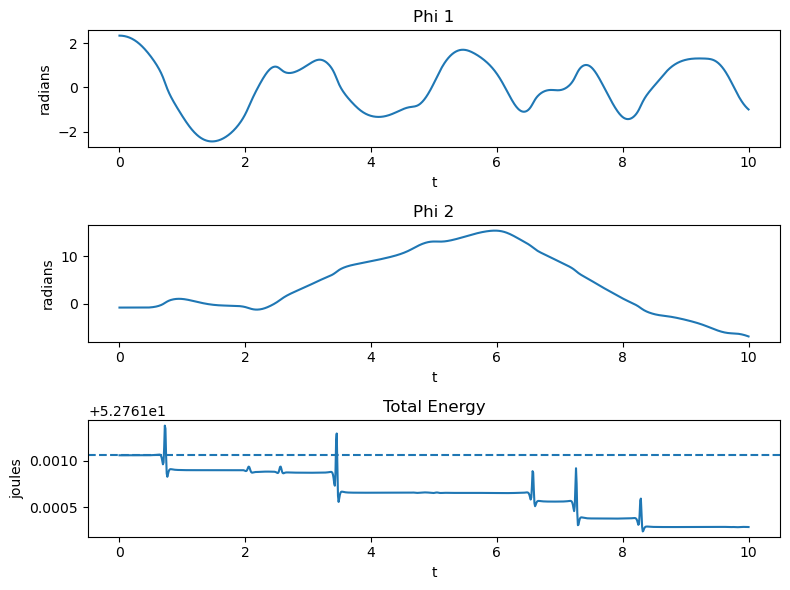

In [113]:
# Do Runge-Kutta Simulation
E_RK = do_RK()

### Euler Simulation

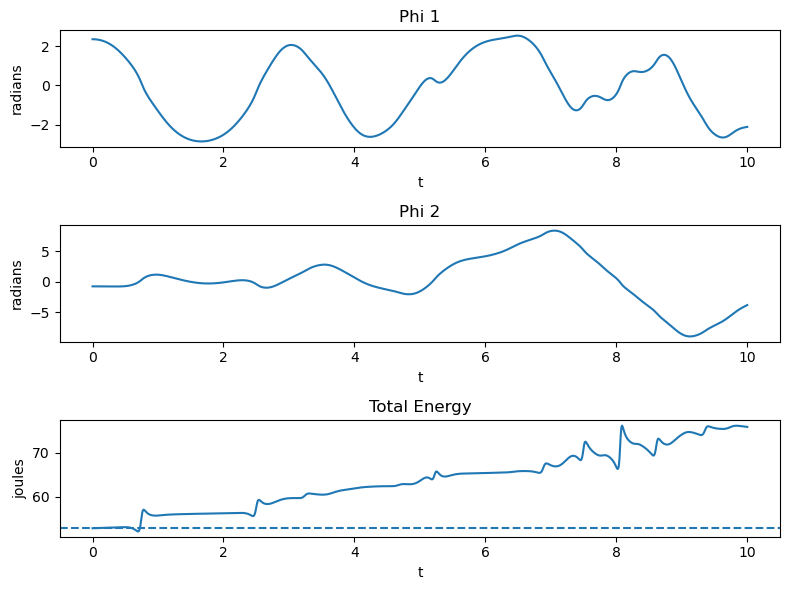

In [114]:
E_EU = do_Euler()

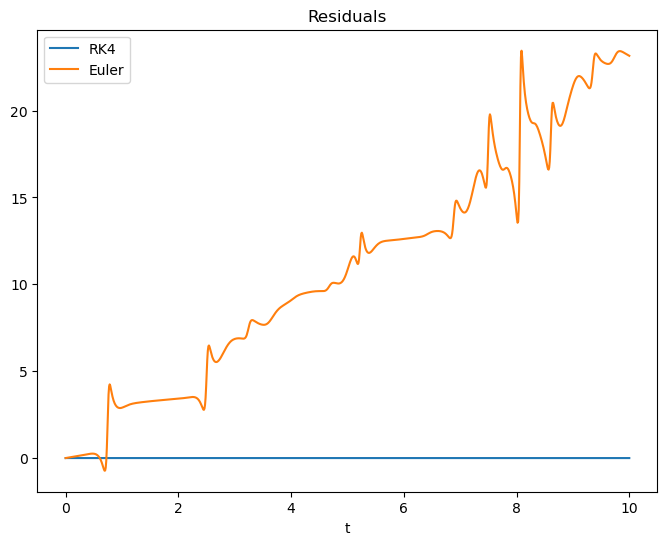

In [122]:
# plot residuals of energy for RK and Euler simulations
res_RK = E_RK-E0
res_EU = E_EU-E0

# Create a 2x1 grid of subplots, from chatGPT
fig, axs = plt.subplots(1, 1, figsize=(8, 6))

# plot both residuals
axs.plot(t, res_RK, label="RK4")
axs.plot(t, res_EU, label="Euler")
axs.set_title('Residuals')
axs.set_xlabel("t")
axs.legend()

As can be seen, the Euler method is no match for RK4. It is able to stick around the same energy for a second, but the energy blows up as the simulation continues. Meanwhile, the RK4 approximation is good for the whole time span, except for a minor decrease in energy.

### Animation Code
Uncomment and run to make a gif of the specified system.

In [5]:
# # Do an animation of the masses, inspired by https://stackoverflow.com/questions/67364991/python-matplotlib-animation-jupyter-notebook

# # constants for plotting
# s1 = 100*m1/(m1+m2) # size proportional to mass
# s2 = 100*m2/(m1+m2)

# def update(i):
#     plt.cla()
#     # plot strings
#     plt.plot([0,xpos[i][0]],[0,ypos[i][0]], marker = 'None', color='red')
#     plt.plot(xpos[i], ypos[i], marker = 'None', color='blue')
    
#     # plot masses
#     plt.scatter(xpos[i][0], ypos[i][0], label='m1', color='red', marker='o', s=s1)
#     plt.scatter(xpos[i][1], ypos[i][1], label='m2', color='blue', marker='o', s=s2)
    
#     # set title and plot limits
#     plt.title(f't = {i*dt:.2f}')
#     plt.xlim(-(L1+L2), L1+L2)
#     plt.ylim(-(L1+L2), L1+L2)
#     plt.grid()

# # initialize plot
# fig = plt.figure()
# # plot strings
# plt.plot([0,xpos[0][0]],[0,ypos[0][0]], marker = 'None', color='red')
# plt.plot(xpos[0], ypos[0], marker = 'None', color='blue')
# # plot masses
# plt.scatter(xpos[0][0], ypos[0][0], label='m1', color='red', marker='o', s=s1)
# plt.scatter(xpos[0][1], ypos[0][1], label='m2', color='blue', marker='o', s=s2)
# plt.xlim(-(L1+L2), L1+L2)
# plt.ylim(-(L1+L2), L1+L2)
# plt.grid()

# ani = anim.FuncAnimation(fig, update, N, interval=dt*1000)
# # uncomment to save animation as a gif - must delete and recreate next cell to reload file
# writergif = anim.PillowWriter(fps=1//dt) 
# ani.save("animation.gif", writer=writergif)
# plt.close() # don't show the animation

### Animation

![pendulum_animation](animation.gif)

In [ ]:
# calculate total energy at each timestep
E = np.array([calc_E(state_i) for state_i in y])
